In [3]:
#import鳶尾花資料庫,pandas
from sklearn.datasets import load_iris
import pandas as pd

#load資料庫資料並用iris代名
iris = load_iris()
#用pandas將資料依照原本irisdata和欄位名做成pandas表格 (iris[""],columns=iris[""])
df = pd.DataFrame(iris["data"],
                 columns=iris["feature_names"])

#新增一行
df["ans"] = iris["target"]

#儲存成csv檔(檔名.csv,用萬國編碼,取消前面編號)
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
from sklearn.cluster import KMeans
#鳶尾花分3群
cluster=KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
df["ans"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
#以誰為圓心,用cluster_center來顯示
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

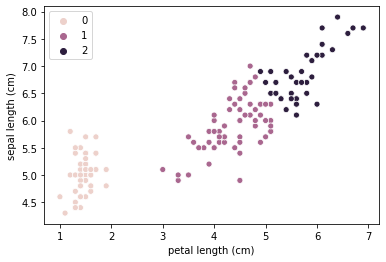

In [10]:
import matplotlib.pyplot as plt
#自動畫圖
%matplotlib inline
import seaborn as sns
sns.scatterplot(df["petal length (cm)"],
               y=df["sepal length (cm)"],
               hue=cluster.labels_)
#plt.xLabel("") 改要在後面

In [12]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2,10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s=silhouette_score(iris["data"], cluster.labels_)
    x.append(k)
    y.append(s)
    print("K:", x)
    print("Score:", y)

K: [2]
Score: [0.681046169211746]
K: [2, 3]
Score: [0.681046169211746, 0.5528190123564091]
K: [2, 3, 4]
Score: [0.681046169211746, 0.5528190123564091, 0.49745518901737446]
K: [2, 3, 4, 5]
Score: [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048]
K: [2, 3, 4, 5, 6]
Score: [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048, 0.3648340039670018]
K: [2, 3, 4, 5, 6, 7]
Score: [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048, 0.3648340039670018, 0.35445799253167404]
K: [2, 3, 4, 5, 6, 7, 8]
Score: [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048, 0.3648340039670018, 0.35445799253167404, 0.35006029596867255]
K: [2, 3, 4, 5, 6, 7, 8, 9]
Score: [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048, 0.3648340039670018, 0.35445799253167404, 0.35006029596867255, 0.33046129197328006]


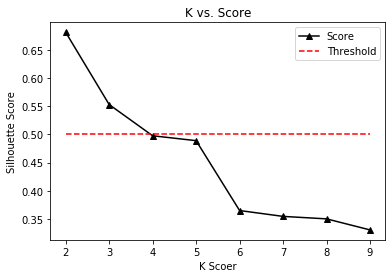

In [16]:
threshold = [0.5] * len(x)
plt.title("K vs. Score")
plt.xlabel("K Scoer")
plt.ylabel("Silhouette Score")
p1, =plt.plot(x,y,"^-k",label="Score")
p2, =plt.plot(x,threshold,"--r",label="Threshold")
plt.legend(handles=[p1,p2])